In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [2]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url, parse_dates=['Month'], index_col='Month')

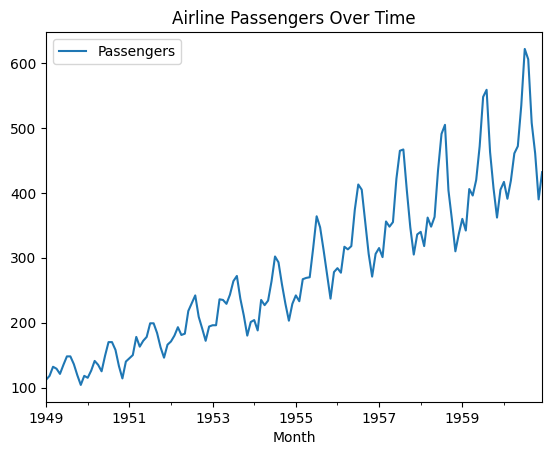

In [3]:
data.plot()
plt.title("Airline Passengers Over Time")
plt.show()

In [4]:
train, test = data[:-12], data[-12:]

In [5]:
model = ARIMA(train, order=(5, 1, 0))  # (p, d, q)
model_fit = model.fit()

c:\Users\developer14\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\developer14\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\developer14\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [6]:
forecast = model_fit.forecast(steps=12)
test['Forecast'] = forecast

C:\Users\developer14\AppData\Local\Temp\ipykernel_22620\3606308872.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Forecast'] = forecast


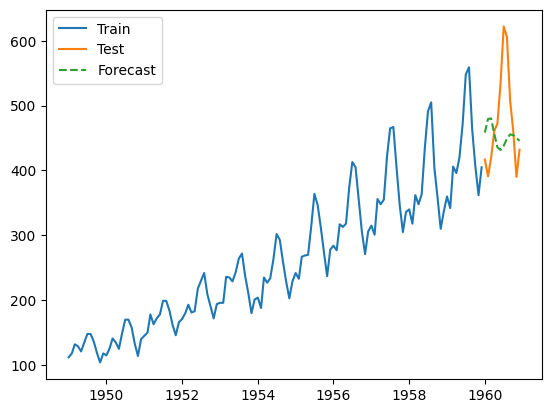

In [7]:
plt.plot(train, label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(test['Forecast'], label='Forecast', linestyle='--')
plt.legend()
plt.show()

In [8]:
mse = mean_squared_error(test['Passengers'], test['Forecast'])
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 7535.998706958308
